## Importation des bibliothèques ##

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Chargement des données ##

In [50]:
df = pd.read_csv("C:/Users/teo11/PROJETS/walmart-sales-analysis/data/Walmart_Sales_Cleaned.csv")

#Afficher les premières lignes
df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


## Vérification des données ##

In [51]:
df.info()
df.describe()

#vérification des valeurs manquantes
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   int64  
 1   date          6435 non-null   object 
 2   weekly_sales  6435 non-null   float64
 3   holiday_flag  6435 non-null   int64  
 4   temperature   6435 non-null   float64
 5   fuel_price    6435 non-null   float64
 6   cpi           6435 non-null   float64
 7   unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64

## Exploration des données ##

In [52]:
print("Nombre total de magasins :", df['store'].nunique())
print("Période couverte :", df['date'].min(), "->", df['date'].max())
print("Total des ventes :", df['weekly_sales'].sum())

Nombre total de magasins : 45
Période couverte : 2010-02-05 -> 2012-10-26
Total des ventes : 6737218987.11


## Visualisation des tendances de ventes ##

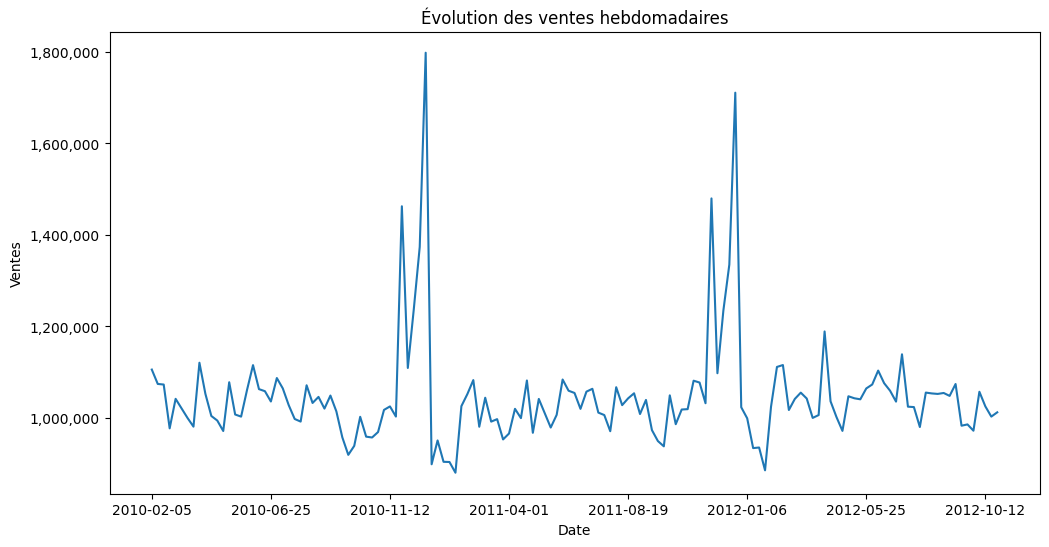

In [60]:
#Evolution des ventes au fil du temps
import matplotlib.ticker as ticker
# Création du graphique
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="date", y="weekly_sales", errorbar=None)

# Titre et labels
plt.title("Évolution des ventes hebdomadaires")
plt.xlabel("Date")
plt.ylabel("Ventes")

# Espacer les labels sur l'axe X
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))  # Affiche seulement 10 dates espacées
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.show()


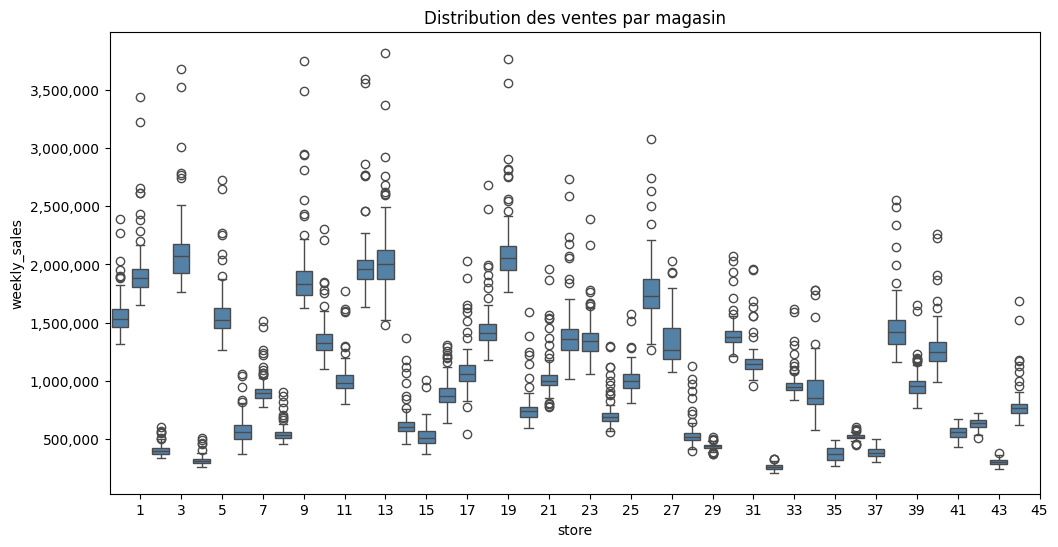

In [61]:
#Répartition des ventes par magasin

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="store", y="weekly_sales", color="steelblue")
# Sélectionner un label sur deux
xticks_labels = df["store"].unique()
plt.xticks(ticks=xticks_labels[::2], labels=xticks_labels[::2])
plt.title("Distribution des ventes par magasin")
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.show()

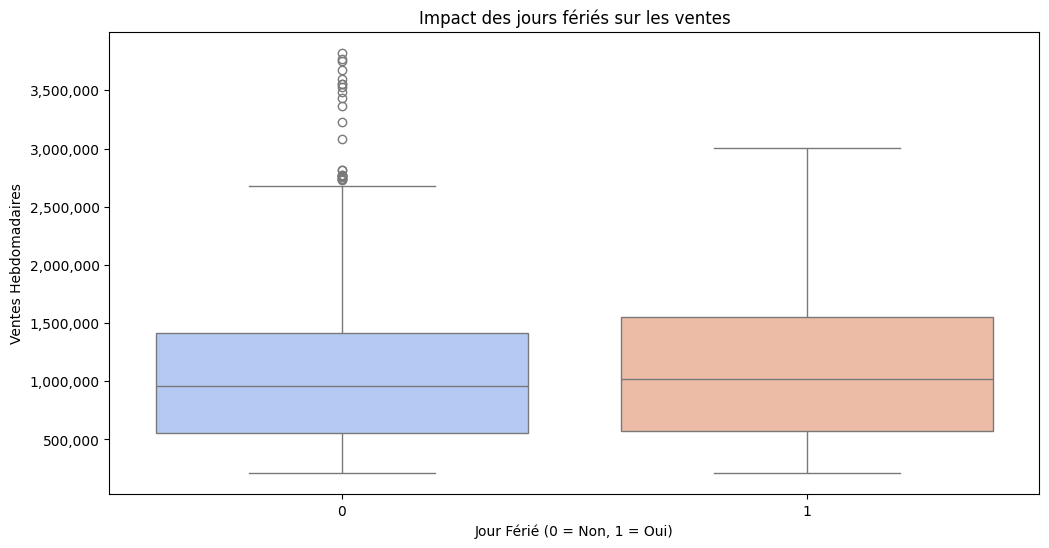

In [62]:
#Impact des jours fériés sur les ventes
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="holiday_flag", y="weekly_sales", hue="holiday_flag", palette="coolwarm", legend=False)
plt.title("Impact des jours fériés sur les ventes")
plt.xlabel("Jour Férié (0 = Non, 1 = Oui)")
plt.ylabel("Ventes Hebdomadaires")
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.show()

## Identifier les magasins les plus performants ##

In [63]:
top_stores = df.groupby("store")["weekly_sales"].sum().sort_values(ascending=False).head(10)
print(top_stores.apply(lambda x: "{:,.0f}".format(x)))

store
20    301,397,792
4     299,543,953
14    288,999,911
13    286,517,704
2     275,382,441
10    271,617,714
27    253,855,917
6     223,756,131
1     222,402,809
39    207,445,542
Name: weekly_sales, dtype: object


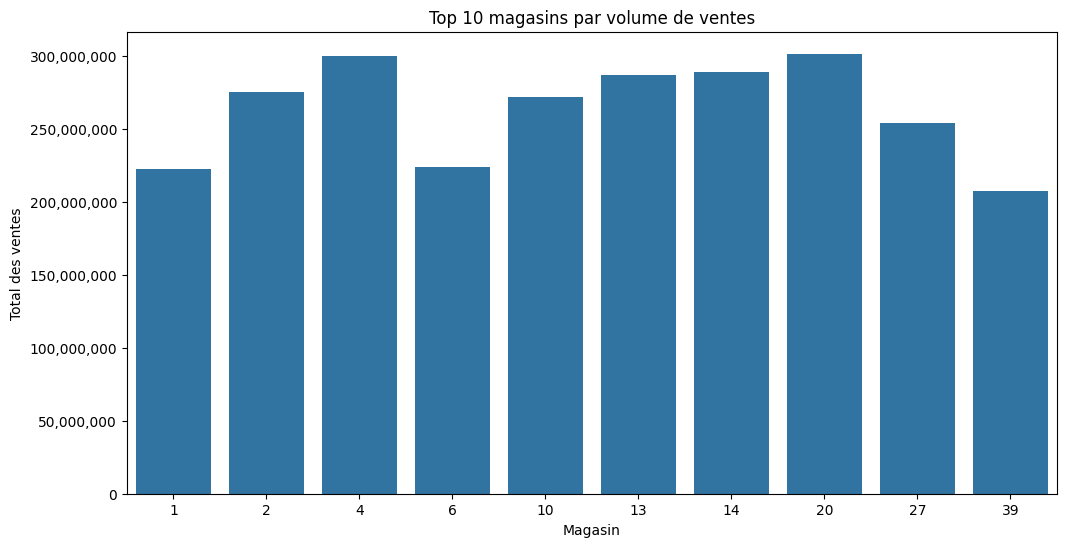

In [64]:
#Visualisation des top magasins
plt.figure(figsize=(12,6))
sns.barplot(x=top_stores.index, y=top_stores.values)
plt.title("Top 10 magasins par volume de ventes")
plt.xlabel("Magasin")
plt.ylabel("Total des ventes")
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.show()

## Impacts des facteurs externes sur les ventes ##

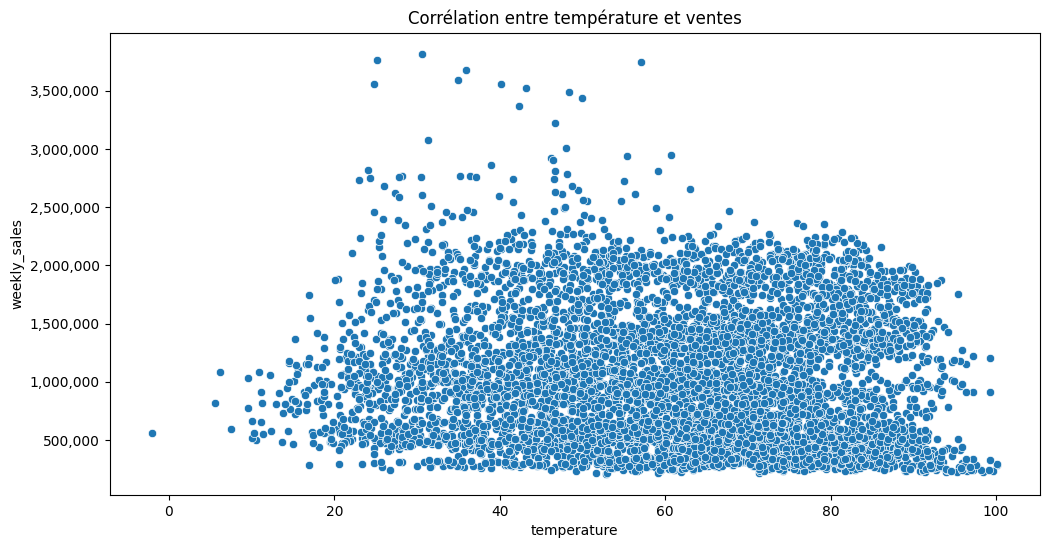

In [65]:
#Influence de la température sur les ventes
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="temperature", y="weekly_sales")
plt.title("Corrélation entre température et ventes")
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.show()

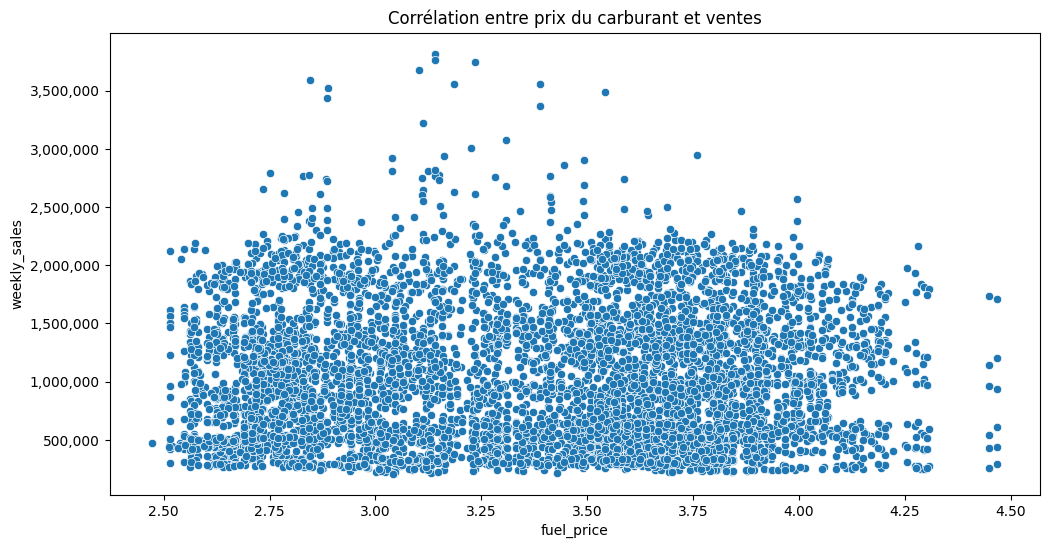

In [66]:
#Corrélation avec le prix du carburant
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="fuel_price", y="weekly_sales")
plt.title("Corrélation entre prix du carburant et ventes")
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.show()

### Résumé des insights ###
- Les ventes varient fortement en fonction des saisons et des jours fériés.
- Certains magasins performent mieux que d’autres (ex : magasins 1, 4 et 10).
- La température a un impact négatif sur les ventes dans certaines périodes.
- Les fluctuations du prix du carburant ne semblent pas avoir un impact direct.